## Linear Regression and Learning Curve challenges - Kalgi Shah

### Challenge 1

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures

In [33]:
df = pd.DataFrame(np.random.randint(1,100,size=(100,1)), columns=list('X'))

In [119]:
df['y'] = np.log(df['X'])
df['X'] = df['X']

In [40]:
poly = PolynomialFeatures()
X2 = poly.fit_transform(X.reshape(-1,1))
y = df['y']

/home/kalgi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [47]:
lr_model = LinearRegression()
lr_model.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
test_set_pred = lr_model.predict(X2)

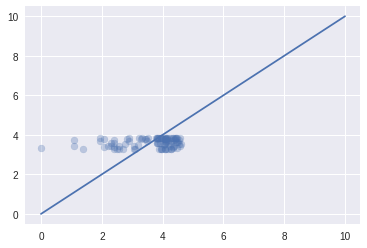

In [51]:
%matplotlib inline
plt.scatter(y,test_set_pred,alpha=.3)
plt.plot(np.linspace(0,10,10),np.linspace(0,10,10))

### Challenge 1 (Part B)

In [87]:
X1 = np.log(df['X'])
y1 = df['y']

In [89]:
lr_model = LinearRegression()
lr_model.fit(X1.reshape(-1, 1),y)

/home/kalgi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


ValueError: Found input variables with inconsistent numbers of samples: [100, 1000]

In [85]:
test_set_pred1 = lr_model.predict(X1.reshape(-1, 1))

/home/kalgi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

ValueError: x and y must be the same size

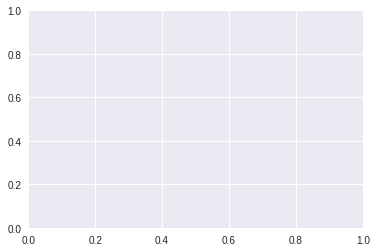

In [86]:
plt.scatter(test_set_pred1,y,alpha=.4)
plt.plot(np.linspace(0,5,10000), np.linspace(0,5,10000),'r--')

### Challenge 2

In [111]:
X2 = np.random.random(1000)
y = 2 + 5*X2 + 9*(X2**2)

In [112]:
X2 = X2.reshape(-1,1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3,random_state=42)
lr_model1 = LinearRegression()
lr_model1.fit(X_train,y_train)
pred2 = lr_model1.predict(X_test)

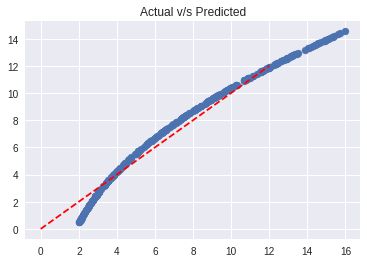

In [114]:
plt.figure()
plt.scatter(y_test,pred2)
plt.plot(np.linspace(0,12,10), np.linspace(0,12,10),'r--')
plt.title("Actual v/s Predicted")

### Challenge 3

In [115]:
from sklearn.pipeline import make_pipeline

/home/kalgi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


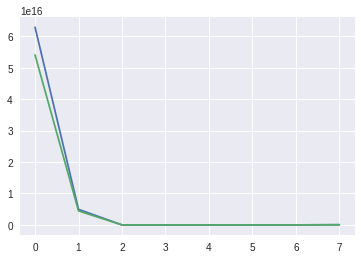

In [116]:
train_errors = []
test_errors = []
test_scores = []
train_scores = []
y = 2 + 5*X + 9*(X**2)
for degree in range(8):
    poly = PolynomialFeatures(degree)
    X2 = poly.fit_transform(X.reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3,random_state=42)
    lr_model = LinearRegression()
    lr_model.fit(X_train,y_train)
    train_set_pred = lr_model.predict(X_train)
    test_set_pred = lr_model.predict(X_test)
    train_score = lr_model.score(X_train,y_train)
    test_score = lr_model.score(X_test,y_test)
    train_error = mean_squared_error(y_train, train_set_pred)
    test_error = mean_squared_error(y_test, test_set_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure()    
plt.plot(range(8),train_errors)
plt.plot(range(8),test_errors)

In [117]:
X2 = poly.fit_transform(X.reshape(-1,1))
train_errors = []
test_errors = []
for n in range(5,71,5):
    model = LinearRegression()
    model.fit(X2.iloc[0:n, :],y[0:n])
    test_set_pred3 = model.predict(X2)
    train_error = mean_squared_error(y_train, train_set_pred)
    
plt.figure()
plt.plot(range(5,71,5),train_errors)
plt.plot(range(5,71,5),test_errors) 

/home/kalgi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'